In [ ]:
#import library
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

In [ ]:
data=pd.read_csv("/content/Steel_industry_data.csv")
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
data.shape

(35040, 11)

In [ ]:
data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [ ]:
#rename attribute
data = data.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 
                          'CO2(tCO2)' : 'CO2'})

In [ ]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


#Correlation matrix ->Since we want to select strong relationships, we need to be able to select values greater than or equal to 0.7 and less than or equal to -0.7 Since this would make our selection statement more complicated, we can simply filter on the absolute value of our correlation coefficient.

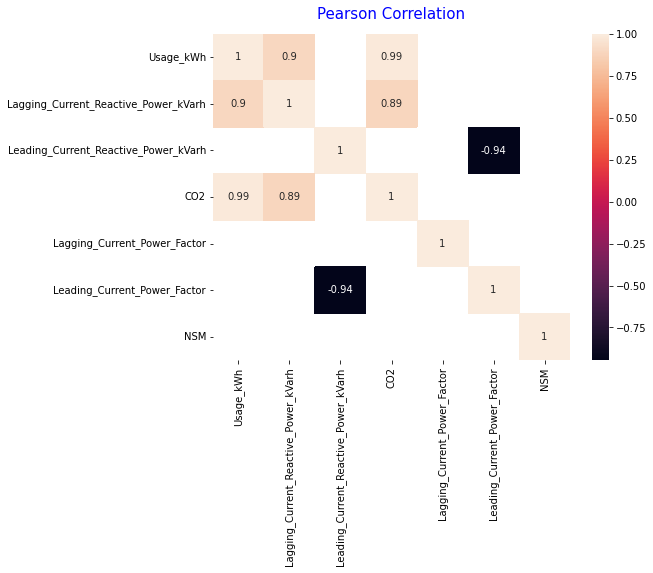

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr()[abs(data.corr())>=0.7], annot = True)
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 15, loc = 'center')
plt.show()

In [ ]:
#analyze the most energy consumption based on time
most_energy_consumption = pd.pivot_table(data, index = 'date', values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.max})
most_energy_consumption.head(10)

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
01/01/2018 01:15,3.82
01/01/2018 01:30,3.28
01/01/2018 01:45,3.60
01/01/2018 02:00,3.60


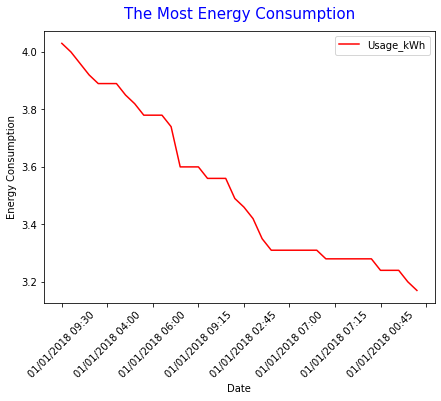

In [ ]:
#visualize the most energy consumption on time
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'Red')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'b', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

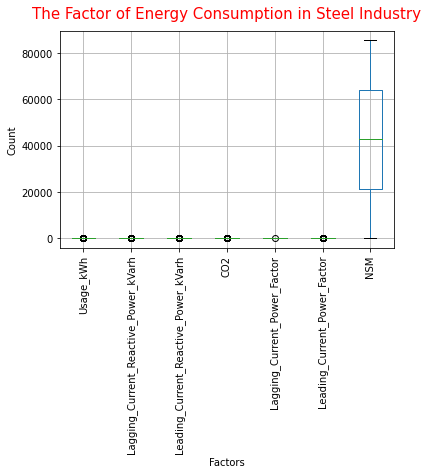

In [ ]:
#analyze the factor of energy consumption
chart = data.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'r', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

#Analyze of energy consumption and NSM based on load type, day of week and week status

In [ ]:

pd.pivot_table(data, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

#Visualize energy consumption based on load type

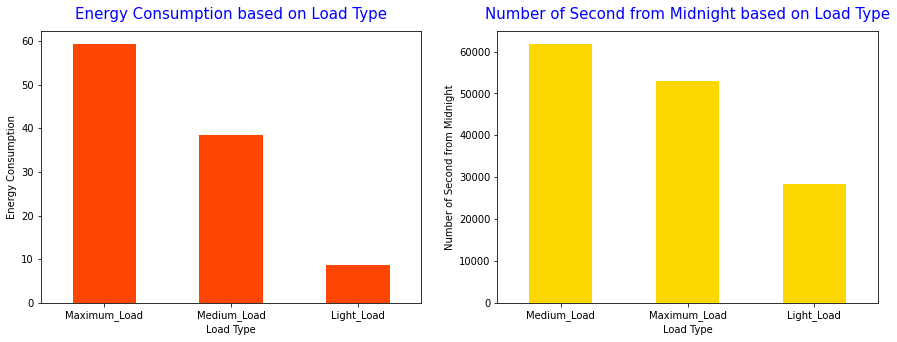

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = data.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

#visualize number of second from midnight based on load type
plt.subplot(1, 2, 2)
chart = data.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'gold')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()

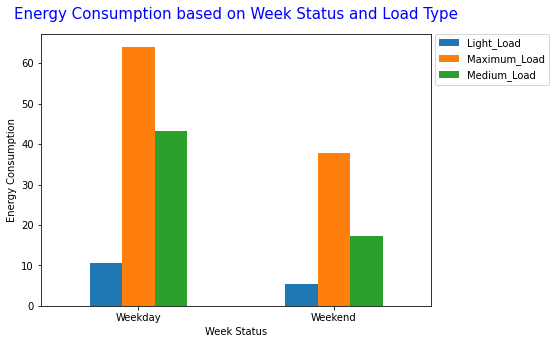

In [ ]:
#visualize energy consumption based on week status and load type
plt.rcParams['figure.figsize'] = (7,5)
chart = data.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

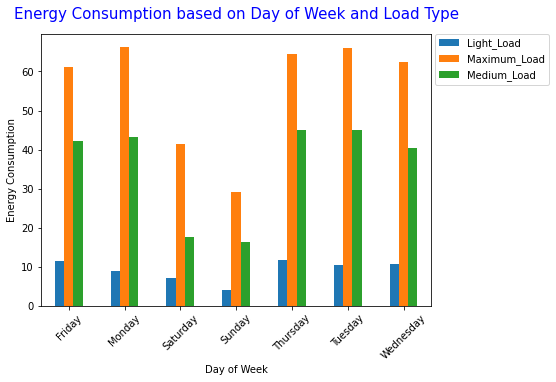

In [ ]:
#visualize energy consumption based on day of week and load type
chart = data.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

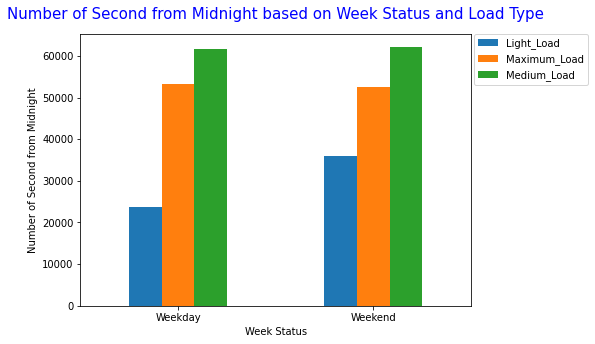

In [ ]:
#visualize number of second from midnight based on week status and load type
chart = data.groupby(['WeekStatus','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

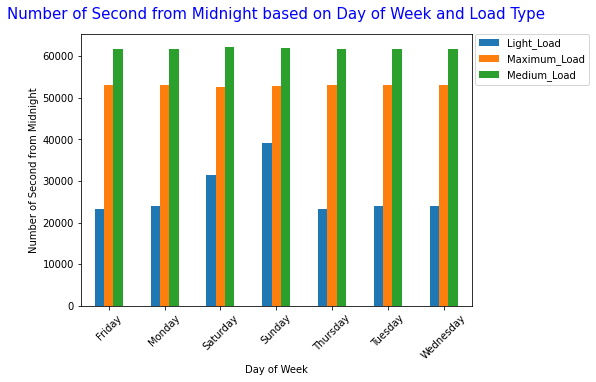

In [ ]:
#visualize number of second from midnight based on day of week and load type
chart = data.groupby(['Day_of_week','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Number of Second from Midnight based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

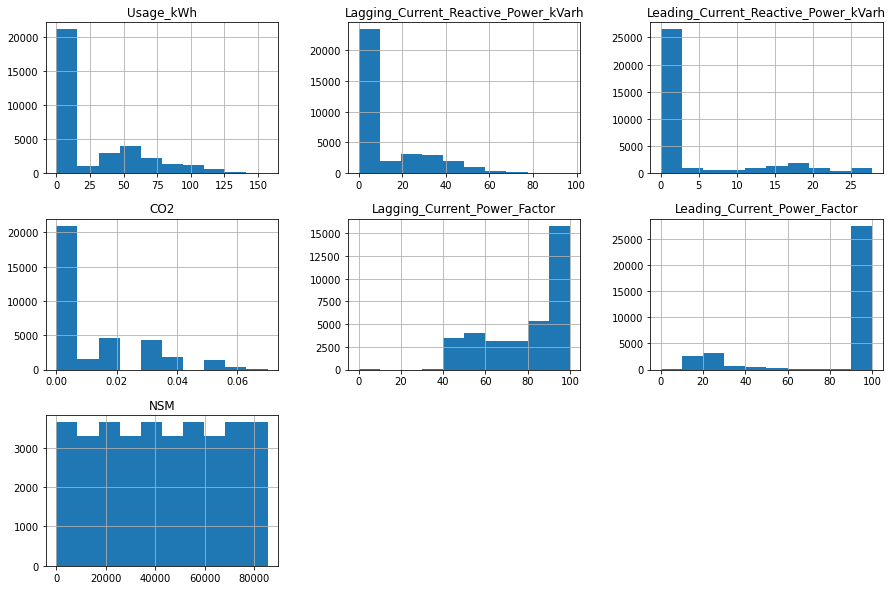

In [ ]:
#distribution of each variable
data.hist(figsize = (15,10))
plt.show()

In [ ]:
#indexing date
df = data.set_index('date')

#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [ ]:
#split data
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24528, 15)
(24528,)
(10512, 15)
(10512,)


In [ ]:
#Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.9841681626773734

In [ ]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)

ridge_pred=ridge.predict(X_train)
ridge_pred_t=ridge.predict(X_test)

print("\nFor Training data\n")
print("Mean Absolute error for Ridge regression:",metrics.mean_absolute_error(y_train,ridge_pred))
print('Mean Squared Error for Ridge regression: ', metrics.mean_squared_error(y_train, ridge_pred))
print('Root Mean Squared Error for Ridge regression: ', math.sqrt(metrics.mean_squared_error(y_train, ridge_pred)))

print("\nFor Testing data\n")
print("Mean Absolute error for Ridge regression:",metrics.mean_absolute_error(y_test,ridge_pred_t))
print('Mean Squared Error for Ridge regression: ', metrics.mean_squared_error(y_test, ridge_pred_t))
print('Root Mean Squared Error for Ridge regression: ', math.sqrt(metrics.mean_squared_error(y_test, ridge_pred_t)))

ridge.score(X_test, y_test)


For Training data

Mean Absolute error for Ridge regression: 4.108005790585605
Mean Squared Error for Ridge regression:  37.01933697635885
Root Mean Squared Error for Ridge regression:  6.084351812342779

For Testing data

Mean Absolute error for Ridge regression: 4.129658195653847
Mean Squared Error for Ridge regression:  35.51065028271909
Root Mean Squared Error for Ridge regression:  5.959081328755221


0.968361386152787

In [ ]:
#Lasso Regression Model
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train, y_train)

lasso_pred=lasso.predict(X_train)
lasso_pred_t=lasso.predict(X_test)

print("\nFor Training data\n")
print("Mean Absolute error for lasso regression:",metrics.mean_absolute_error(y_train,lasso_pred))
print('Mean Squared Error for lasso regression: ', metrics.mean_squared_error(y_train, lasso_pred))
print('Root Mean Squared Error for lasso regression: ', math.sqrt(metrics.mean_squared_error(y_train, lasso_pred)))

print("\nFor Testing data\n")
print("Mean Absolute error for lasso regression:",metrics.mean_absolute_error(y_test,lasso_pred_t))
print('Mean Squared Error for lasso regression: ', metrics.mean_squared_error(y_test, lasso_pred_t))
print('Root Mean Squared Error for lasso regression: ', math.sqrt(metrics.mean_squared_error(y_test, lasso_pred_t)))

lasso.score(X_test, y_test)


For Training data

Mean Absolute error for lasso regression: 6.765019008196561
Mean Squared Error for lasso regression:  96.59265708164385
Root Mean Squared Error for lasso regression:  9.828156341941446

For Testing data

Mean Absolute error for lasso regression: 6.958401638582877
Mean Squared Error for lasso regression:  101.15479357255734
Root Mean Squared Error for lasso regression:  10.057573940695507


0.9098749972992153

In [ ]:
y_pred_t=lr.predict(X_train)

print("For Training Data")
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_train, y_pred_t))
print('Mean Squared Error : ', metrics.mean_squared_error(y_train, y_pred_t))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_train, y_pred_t)))

For Training Data
Mean Absolute Error :  2.6215792178241983
Mean Squared Error :  23.70245133351999
Root Mean Squared Error :  4.868516338015103


In [ ]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[  3.09659745  70.15826234 124.42399214 ...   2.22293667   1.54271064
   3.94845762]


In [ ]:
#check MAE, MSE and RMSE
print("For Testing data")
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For Testing data
Mean Absolute Error :  2.551917608738632
Mean Squared Error :  17.769389051354363
Root Mean Squared Error :  4.215375315598169


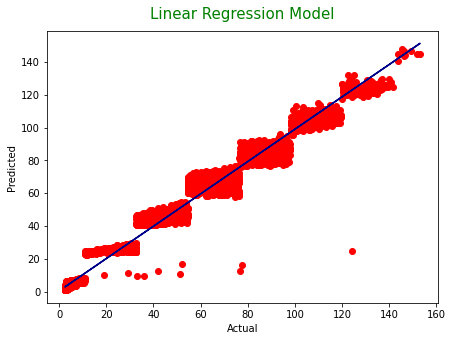

In [ ]:
#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()